## Προσωμοίωση Κέρδους Κορώνα-Γράμματα ##

In [23]:
import numpy as np
import matplotlib.pyplot as plt


def biased_flip(bias : float) -> str:
    return 'H' if np.random.random() < bias else 'T'

def simulate_pnl(simulations : int, bias : float) -> list[float]:
    results = [0]

    for _ in range(simulations):
        result = biased_flip(bias)
        
        results.append(10 if result == 'H' else -10)
    
    return list(np.cumsum(results))


def plot_pnl(pnls : list) -> None:
    plt.style.use('dark_background')

    xs = list(range(len(pnls)))

    plt.plot(xs, pnls, label='Κορώνα', color='blue')
    plt.plot(xs, [-pnl for pnl in pnls], label='Γράμματα', color='red')

    plt.ylabel("Συνολικό Κέρδος σε Ευρώ")
    plt.xlabel("Συνολικές Ρίψεις")
    
    plt.legend()
    plt.show()

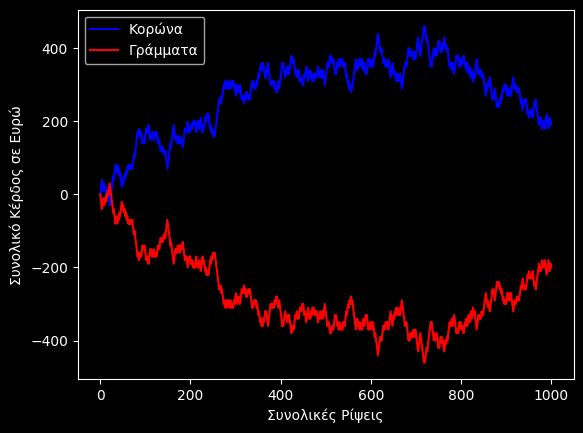

In [24]:
BIAS = 0.51
TRIALS = 1000

pnl = simulate_pnl(TRIALS, BIAS)

plot_pnl(pnl)

## Πιθανότητα Χασούρας ##

In [ ]:
def approximate_loss_probability(trials : int, bias : float, sims : int = 5000) -> list[int, float]:
    intermediate_results = np.array([0 for _ in range(trials + 1)])

    for _ in range(sims):
        pnl = simulate_pnl(trials, bias)

        neg_pnl = np.array(pnl) < 0

        intermediate_results += neg_pnl

    return [count / sims for count in intermediate_results]

def plot_loss_probability(data : list[float]) -> None:
    plt.style.use('dark_background')

    xs = list(range(len(data)))

    plt.ylabel("Πιθανότητα να χάσουμε επιλέγοντας κορώνα")
    plt.xlabel("Συνολικές Ρίψεις")

    plt.plot(xs, data, color='red')
    
    plt.show()

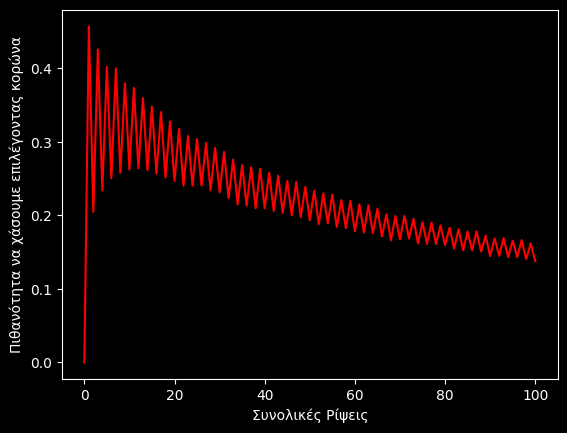

In [55]:
MAX_TRIALS = 100
BIAS = 0.55

data = approximate_loss_probability(MAX_TRIALS, BIAS)
plot_loss_probability(data)

## Μέσο κέρδος ανά ρίψη ##

In [ ]:
def get_mean_profit(trials : int, bias : float, sims : int = 1000) -> list[float]:
    intermediate_res = np.zeros(trials)

    for _ in range(sims):    
        pnls = simulate_pnl(trials, bias)

        pnls = np.array(pnls) / np.arange(1, trials)

        intermediate_res += pnls
    
    return intermediate_res / sims

def plot_mean_profit(data : list[float]) -> None:
    plt.style.use('dark_background')

    xs = list(range(len(data)))

    plt.ylabel("Μέσο κέρδος ανά ρίψη")
    plt.xlabel("Συνολικές Ρίψεις")

    plt.plot(xs, data, color='red')
    
    plt.show()

In [ ]:
BIAS = 0.51
TRIALS = 100
